<a href="https://colab.research.google.com/github/nasiksami/NCT/blob/main/Test_of_CNN%2C_HAN%2C_RNN_on_NTC_Tickets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Overview**


On this notebook, we have used **3** different Deep Learning Approaches nameley **Convolutional Neural Network, Hierarchical Attention Network and Recurrent Neural Network** to classify the **Severity of Cyberbullying** across the social media contents. For the dataset, we have used data from **2** different sources. The **first** one is from  "https://github.com/Kavita309/Severity-of-cyberbullying-across-SMPs/tree/master/DataSets/CSV" and the **second** one is from "https://github.com/Mrezvan94/Harassment-Corpus" they have provided the data upon request. The number of instances are **28551**. There are total **4 classes** of data depending on the severity. The classes are **"High", "Medium", "Low" and "None".** We have concatenated the data from these sources and preprocessed them accordingly. 

**Tutorial source for the experiments :** https://medium.com/jatana/report-on-text-classification-using-cnn-rnn-han-f0e887214d5f

**Code reference:** https://github.com/geniusai-research/Text-Classification

**More about Beautiful Soap**: https://programminghistorian.org/en/lessons/intro-to-beautiful-soup

**More about Tokenization** https://www.analyticsvidhya.com/blog/2019/07/how-get-started-nlp-6-unique-ways-perform-tokenization/

**More about Glove:** https://nlp.stanford.edu/projects/glove/#:~:text=GloVe%20is%20an%20unsupervised%20learning,of%20the%20word%20vector%20space.

https://towardsdatascience.com/light-on-math-ml-intuitive-guide-to-understanding-glove-embeddings-b13b4f19c010

**Deep Learning for text classification Blog :** https://towardsdatascience.com/the-mostly-complete-chart-of-neural-networks-explained-3fb6f2367464

**Other relevant sources for CNN**   
https://medium.com/voice-tech-podcast/text-classification-using-cnn-9ade8155dfb9

https://towardsdatascience.com/text-classification-with-cnns-in-pytorch-1113df31e79f


https://cezannec.github.io/CNN_Text_Classification/



**Other relevant sources for HAN :**

https://medium.com/analytics-vidhya/hierarchical-attention-networks-d220318cf87e

https://humboldt-wi.github.io/blog/research/information_systems_1819/group5_han/

**Other relevant sources for RNN:**

https://towardsdatascience.com/text-classification-rnns-or-cnn-s-98c86a0dd361#:~:text=RNN%20is%20a%20class%20of,a%20message%20to%20a%20successor.


https://towardsai.net/p/deep-learning/text-classification-with-rnn






In [ ]:
#importing relevent libraries
import numpy as np
import pandas as pd
import pickle
from collections import defaultdict
import re
from bs4 import BeautifulSoup
import sys
import os
os.environ['KERAS_BACKEND']='theano' # Why theano why not
from keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.sequence import pad_sequences
import time
from keras.utils.np_utils import to_categorical
from keras.layers import Embedding
from keras.layers import Dense, Input, Flatten
from keras.layers import Conv1D, MaxPooling1D, Embedding, Dropout
from keras.models import Model
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
plt.switch_backend('agg')
%matplotlib inline

In [ ]:
#preprocessing the data
def clean_str(string):
    string = re.sub(r"\\", "", string)
    string = re.sub(r"\'", "", string)
    string = re.sub(r"\"", "", string)
    return string.strip().lower()

In [ ]:
#defining variable lengths
MAX_SEQUENCE_LENGTH = 1000
MAX_NB_WORDS = 20000
EMBEDDING_DIM = 100
VALIDATION_SPLIT = 0.2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# reading data
df = pd.read_csv('/content/drive/MyDrive/Dataset_Raw/cleaned_completed_train.csv')
df = df.dropna()
df = df.reset_index(drop=True)
df.columns = ['Headline','Description','Network_Impact']

In [ ]:
print('Shape of dataset ',df.shape)
print(df.columns)
print('No. of unique classes',len(set(df['Network_Impact'])))

Shape of dataset  (209252, 3)
Index(['Headline', 'Description', 'Network_Impact'], dtype='object')
No. of unique classes 4


In [ ]:
df.drop(columns='Headline',inplace=True)

In [ ]:
df.head()

,Description,Network_Impact
0,paging annual preventive maintenance maintenan...,Outage
1,turnc parenting node bs tournc turnc night se...,Outage
2,nika,Outage
3,lobby camera digital upgrade,Outage
4,quam mod install,Outage


In [ ]:
print('Shape of dataset ',df.shape)
print(df.columns)
print('No. of unique classes',len(set(df['Network_Impact'])))

Shape of dataset  (209252, 2)
Index(['Description', 'Network_Impact'], dtype='object')
No. of unique classes 4


In [ ]:

macronum=sorted(set(df['Network_Impact']))
macro_to_id = dict((note, number) for number, note in enumerate(macronum))

def fun(i):
    return macro_to_id[i]

df['Network_Impact']=df['Network_Impact'].apply(fun)


In [ ]:
texts = []
labels = []

for idx in range(df.Description.shape[0]):
    text = BeautifulSoup(df.Description[idx])
    texts.append(clean_str(str(text.get_text().encode())))

for idx in df['Network_Impact']:
    labels.append(idx)

In [ ]:
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Number of Unique Tokens',len(word_index))

Number of Unique Tokens 73811


In [ ]:
data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

labels = to_categorical(np.asarray(labels))
print('Shape of Data Tensor:', data.shape)
print('Shape of Label Tensor:', labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
nb_validation_samples = int(VALIDATION_SPLIT * data.shape[0])

x_train = data[:-nb_validation_samples]
y_train = labels[:-nb_validation_samples]
x_val = data[-nb_validation_samples:]
y_val = labels[-nb_validation_samples:]

Shape of Data Tensor: (209252, 1000)
Shape of Label Tensor: (209252, 4)


In [ ]:
#!wget http://nlp.stanford.edu/data/glove.6B.zip

In [ ]:
#!unzip glove*.zip

In [ ]:
#!ls
#!pwd

In [ ]:
# print('Indexing word vectors.')

# embeddings_index = {}
# f = open('glove.6B.200d.txt', encoding='utf-8')
# for line in f:
#     values = line.split()
#     word = values[0]
#     coefs = np.asarray(values[1:], dtype='float32')
#     embeddings_index[word] = coefs
# f.close()

# print('Found %s word vectors.' % len(embeddings_index))

In [ ]:
#importing Glove 6B 100d

embeddings_index = {}
f = open('/content/drive/MyDrive/embeddings/glove.6B.100d.txt',encoding='utf8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Total %s word vectors in Glove 6B 100d.' % len(embeddings_index))

Total 400000 word vectors in Glove 6B 100d.


In [ ]:
embedding_matrix = np.random.random((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

embedding_layer = Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,trainable=True)

In [ ]:
#defining the convolutional neural network layers 
#we have used relu as the optimizer and categorical crossentropy as the loss function 
#as our problem is solving multiclass classification problem 

sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
l_cov1= Conv1D(128, 5, activation='relu')(embedded_sequences)
l_pool1 = MaxPooling1D(5)(l_cov1)
l_cov2 = Conv1D(128, 5, activation='relu')(l_pool1)
l_pool2 = MaxPooling1D(5)(l_cov2)
l_cov3 = Conv1D(128, 5, activation='relu')(l_pool2)
l_pool3 = MaxPooling1D(35)(l_cov3)  # global max pooling
l_flat = Flatten()(l_pool3)
l_dense = Dense(128, activation='relu')(l_flat)
preds = Dense(len(macronum), activation='softmax')(l_dense) #this will connect the neural network output layers to the number of classes we have in our dataset as the dependent variable 

model = Model(sequence_input, preds)
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

print("Simplified convolutional neural network")
model.summary()
cp=ModelCheckpoint('model_cnn.hdf5',monitor='val_acc',verbose=1,save_best_only=True)

Simplified convolutional neural network
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1000)]            0         
                                                                 
 embedding_2 (Embedding)     (None, 1000, 100)         7381200   
                                                                 
 conv1d_6 (Conv1D)           (None, 996, 128)          64128     
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 199, 128)         0         
 1D)                                                             
                                                                 
 conv1d_7 (Conv1D)           (None, 195, 128)          82048     
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 39, 128)          0         
 1D)               

In [ ]:
start_time = time.time()
history=model.fit(x_train, y_train, validation_data=(x_val, y_val),epochs=20, batch_size=256,callbacks=[cp])
end_time = time.time()
print("Time taken to train this experiment : ", end_time - start_time, "seconds")

Epoch 1/20
654/654 [==============================] - ETA: 0s - loss: 0.7721 - acc: 0.6920
Epoch 1: val_acc improved from -inf to 0.75364, saving model to model_cnn.hdf5
654/654 [==============================] - 66s 97ms/step - loss: 0.7721 - acc: 0.6920 - val_loss: 0.6432 - val_acc: 0.7536
Epoch 2/20
654/654 [==============================] - ETA: 0s - loss: 0.5493 - acc: 0.7926
Epoch 2: val_acc improved from 0.75364 to 0.79983, saving model to model_cnn.hdf5
654/654 [==============================] - 51s 78ms/step - loss: 0.5493 - acc: 0.7926 - val_loss: 0.5255 - val_acc: 0.7998
Epoch 3/20
654/654 [==============================] - ETA: 0s - loss: 0.4713 - acc: 0.8235
Epoch 3: val_acc improved from 0.79983 to 0.80855, saving model to model_cnn.hdf5
654/654 [==============================] - 51s 78ms/step - loss: 0.4713 - acc: 0.8235 - val_loss: 0.5072 - val_acc: 0.8086
Epoch 4/20
654/654 [==============================] - ETA: 0s - loss: 0.4182 - acc: 0.8420
Epoch 4: val_acc improve

Visualizing the layers of the neural network

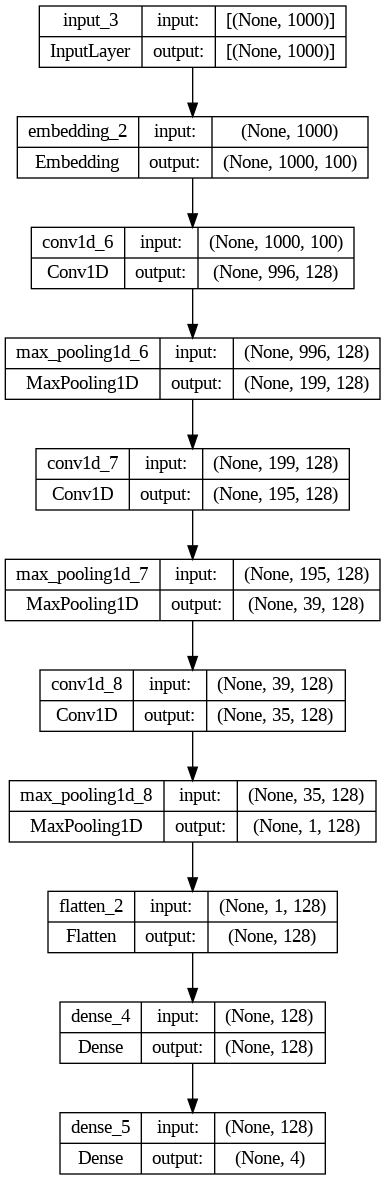

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='cnn_model.png', show_shapes=True, show_layer_names=True)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(x_val)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

1308/1308 [==============================] - 5s 4ms/step


In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.46      0.55      2514
           1       0.86      0.90      0.88     20044
           2       0.82      0.88      0.85     13657
           3       0.78      0.63      0.70      5635

    accuracy                           0.83     41850
   macro avg       0.79      0.72      0.75     41850
weighted avg       0.83      0.83      0.83     41850



In [ ]:
conf_mat = confusion_matrix(y_true, y_pred)
print(conf_mat)

[[ 1164   463   791    96]
 [  175 18094  1105   670]
 [  304  1109 12003   241]
 [   61  1310   688  3576]]


In [ ]:
import seaborn as sns

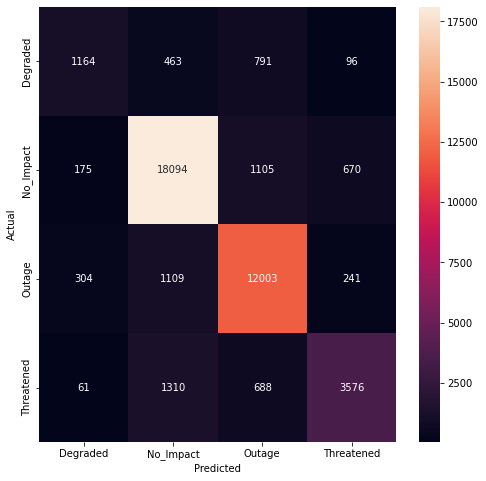

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, fmt='d',
xticklabels=macronum, yticklabels=macronum)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

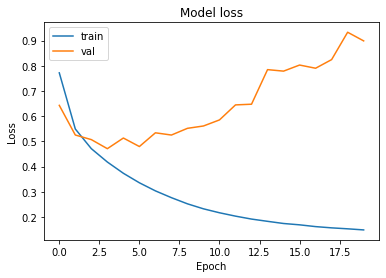

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

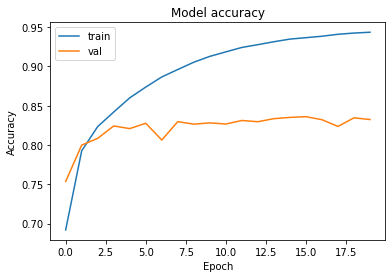

In [ ]:
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='val')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

HAN on the dataset

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import pickle
from collections import defaultdict
import re
import time
from bs4 import BeautifulSoup
import sys
import os
os.environ['KERAS_BACKEND']='theano'
from keras.preprocessing.text import Tokenizer,text_to_word_sequence
#from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.layers import Embedding
from keras.layers import Dense, Input, Flatten
from keras.layers import Conv1D, MaxPooling1D, Embedding, Dropout, LSTM, GRU, Bidirectional, TimeDistributed
from keras.models import Model
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
plt.switch_backend('agg')
from keras import backend as K
#from keras.engine.topology import Layer, InputSpec
from tensorflow.keras.layers import Layer, InputSpec
from keras import initializers
%matplotlib inline

In [ ]:
print('Shape of dataset ',df.shape)
print(df.columns)
print('No. of unique classes',len(set(df['Network_Impact'])))

Shape of dataset  (209252, 2)
Index(['Description', 'Network_Impact'], dtype='object')
No. of unique classes 4


In [ ]:
def clean_str(string):
    string = re.sub(r"\\", "", string)
    string = re.sub(r"\'", "", string)
    string = re.sub(r"\"", "", string)
    return string.strip().lower()

In [ ]:
MAX_SENT_LENGTH = 100
MAX_SENTS = 15
MAX_NB_WORDS = 20000
EMBEDDING_DIM = 100
VALIDATION_SPLIT = 0.2

In [ ]:
import nltk
from nltk import tokenize

reviews = []
labels = []
texts = []

In [ ]:
macronum=sorted(set(df['Network_Impact']))
macro_to_id = dict((note, number) for number, note in enumerate(macronum))

In [ ]:
def fun(i):
    return macro_to_id[i]

df['Network_Impact']=df['Network_Impact'].apply(fun)

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
for i in range(df.Description.shape[0]):
    text = BeautifulSoup(df.Description[i])
    text=clean_str(str(text.get_text().encode()).lower())
    texts.append(text)
    sentences = tokenize.sent_tokenize(text)
    reviews.append(sentences)


for i in df['Network_Impact']:
    labels.append(i)

In [ ]:

tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(texts)

data = np.zeros((len(texts), MAX_SENTS, MAX_SENT_LENGTH), dtype='int64')

for i, sentences in enumerate(reviews):
    for j, sent in enumerate(sentences):
        if j< MAX_SENTS:
            wordTokens = text_to_word_sequence(sent)
            k=0
            for _, word in enumerate(wordTokens):
                if k<MAX_SENT_LENGTH and tokenizer.word_index[word]<MAX_NB_WORDS:
                    data[i,j,k] = tokenizer.word_index[word]
                    k=k+1

In [ ]:

word_index = tokenizer.word_index
print('No. of %s unique tokens.' % len(word_index))

No. of 73811 unique tokens.


In [ ]:
labels = to_categorical(np.asarray(labels))
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)


indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
nb_validation_samples = int(VALIDATION_SPLIT * data.shape[0])

Shape of data tensor: (209252, 15, 100)
Shape of label tensor: (209252, 4)


In [ ]:
x_train = data[:-nb_validation_samples]
y_train = labels[:-nb_validation_samples]
x_val = data[-nb_validation_samples:]
y_val = labels[-nb_validation_samples:]

In [ ]:
embeddings_index = {}
f = open('/content/drive/MyDrive/embeddings/glove.6B.100d.txt',encoding='utf8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Total %s word vectors.' % len(embeddings_index))

Total 400000 word vectors.


In [ ]:
embedding_matrix = np.random.random((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

embedding_layer = Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SENT_LENGTH,
                            trainable=True)

In [ ]:
sentence_input = Input(shape=(MAX_SENT_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sentence_input)
l_lstm = Bidirectional(LSTM(100))(embedded_sequences)
sentEncoder = Model(sentence_input, l_lstm)

review_input = Input(shape=(MAX_SENTS,MAX_SENT_LENGTH), dtype='int32')
review_encoder = TimeDistributed(sentEncoder)(review_input)
l_lstm_sent = Bidirectional(LSTM(100))(review_encoder)
preds = Dense(len(macronum), activation='softmax')(l_lstm_sent)
model = Model(review_input, preds)

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

print("Hierachical LSTM")
model.summary()

Hierachical LSTM
Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 15, 100)]         0         
                                                                 
 time_distributed (TimeDistr  (None, 15, 200)          7542000   
 ibuted)                                                         
                                                                 
 bidirectional_1 (Bidirectio  (None, 200)              240800    
 nal)                                                            
                                                                 
 dense_6 (Dense)             (None, 4)                 804       
                                                                 
Total params: 7,783,604
Trainable params: 7,783,604
Non-trainable params: 0
_________________________________________________________________


In [ ]:
start_time = time.time()
cp=ModelCheckpoint('model_han_.hdf5',monitor='val_acc',verbose=1,save_best_only=True)
history=model.fit(x_train, y_train, validation_data=(x_val, y_val),
          epochs=20, batch_size=256,callbacks=[cp])
end_time = time.time()
print("Time taken to train this experiment : ", end_time - start_time, "seconds")

Epoch 1/20
654/654 [==============================] - ETA: 0s - loss: 0.7662 - acc: 0.6974
Epoch 1: val_acc improved from -inf to 0.77895, saving model to model_han_.hdf5
654/654 [==============================] - 168s 246ms/step - loss: 0.7662 - acc: 0.6974 - val_loss: 0.5823 - val_acc: 0.7789
Epoch 2/20
654/654 [==============================] - ETA: 0s - loss: 0.5339 - acc: 0.8015
Epoch 2: val_acc improved from 0.77895 to 0.81524, saving model to model_han_.hdf5
654/654 [==============================] - 148s 227ms/step - loss: 0.5339 - acc: 0.8015 - val_loss: 0.5002 - val_acc: 0.8152
Epoch 3/20
654/654 [==============================] - ETA: 0s - loss: 0.4699 - acc: 0.8274
Epoch 3: val_acc improved from 0.81524 to 0.83164, saving model to model_han_.hdf5
654/654 [==============================] - 148s 226ms/step - loss: 0.4699 - acc: 0.8274 - val_loss: 0.4629 - val_acc: 0.8316
Epoch 4/20
654/654 [==============================] - ETA: 0s - loss: 0.4280 - acc: 0.8432
Epoch 4: val_ac

Plotting the Accuracy and Loss curves 

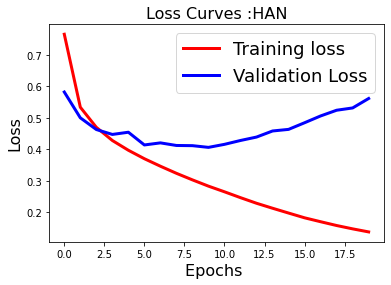

In [ ]:
fig1 = plt.figure()
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves :HAN',fontsize=16)
fig1.savefig('loss_han.png')
plt.show()

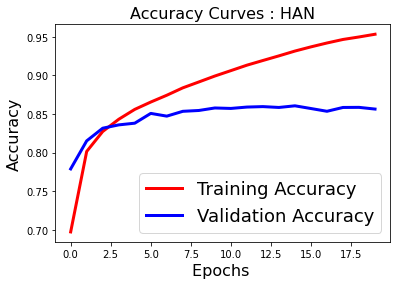

In [ ]:
fig2=plt.figure()
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves : HAN',fontsize=16)
fig2.savefig('accuracy_han.png')
plt.show()

**Plotting the model Architecture**

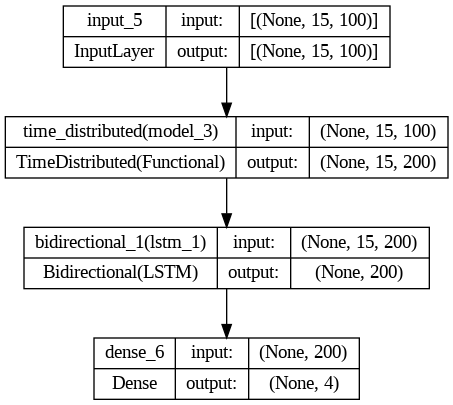

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='han_model.png', show_shapes=True, show_layer_names=True)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(x_val)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

1308/1308 [==============================] - 18s 13ms/step


In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.59      0.62      2526
           1       0.90      0.91      0.90     19931
           2       0.88      0.90      0.89     13812
           3       0.73      0.71      0.72      5581

    accuracy                           0.86     41850
   macro avg       0.79      0.77      0.78     41850
weighted avg       0.85      0.86      0.86     41850



In [ ]:
conf_mat = confusion_matrix(y_true, y_pred)
print(conf_mat)

[[ 1486   319   576   145]
 [  264 18050   668   949]
 [  388   673 12362   389]
 [  132  1068   438  3943]]


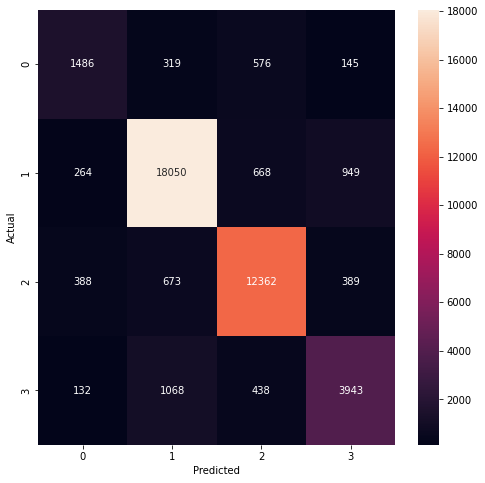

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, fmt='d',
xticklabels=macronum, yticklabels=macronum)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

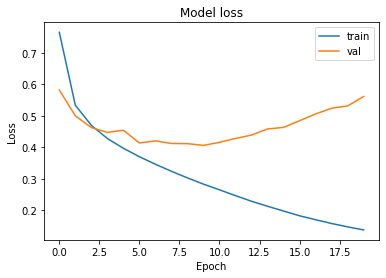

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

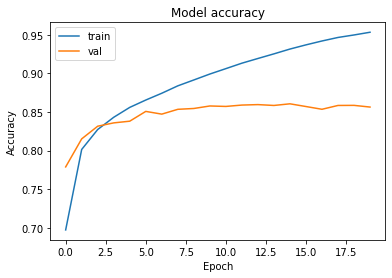

In [ ]:
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='val')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

**RNN on the dataset**


In [ ]:
import numpy as np
import pandas as pd
import pickle
from collections import defaultdict
import re
from bs4 import BeautifulSoup
import sys
import os
os.environ['KERAS_BACKEND']='theano'
from keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Layer, InputSpec
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.layers import Embedding
from keras.layers import Dense, Input, Flatten
from keras.layers import Conv1D, MaxPooling1D, Embedding, Dropout, LSTM, GRU, Bidirectional
from keras.models import Model
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
plt.switch_backend('agg')
from keras import backend as K
#from keras.engine.topology import Layer, InputSpec
from keras import initializers
%matplotlib inline

In [ ]:
def clean_str(string):
    string = re.sub(r"\\", "", string)
    string = re.sub(r"\'", "", string)
    string = re.sub(r"\"", "", string)
    return string.strip().lower()

In [ ]:

MAX_SEQUENCE_LENGTH = 1000
MAX_NB_WORDS = 20000
EMBEDDING_DIM = 100
VALIDATION_SPLIT = 0.2

In [ ]:
df = df.reset_index(drop=True)
print('Shape of dataset ',df.shape)
print(df.columns)
print('No. of unique classes',len(set(df['Network_Impact'])))

Shape of dataset  (209252, 2)
Index(['Description', 'Network_Impact'], dtype='object')
No. of unique classes 4


In [ ]:

macronum=sorted(set(df['Network_Impact']))
macro_to_id = dict((note, number) for number, note in enumerate(macronum))

def fun(i):
    return macro_to_id[i]

df['Network_Impact']=df['Network_Impact'].apply(fun)

In [ ]:
texts = []
labels = []


for idx in range(df.Description.shape[0]):
    text = BeautifulSoup(df.Description[idx])
    texts.append(clean_str(str(text.get_text().encode())))

for idx in df['Network_Impact']:
    labels.append(idx)

In [ ]:
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index

print('Number of Unique Tokens',len(word_index))

Number of Unique Tokens 73811


In [ ]:

data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)


labels = to_categorical(np.asarray(labels))
print('Shape of Data Tensor:', data.shape)
print('Shape of Label Tensor:', labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
nb_validation_samples = int(VALIDATION_SPLIT * data.shape[0])

x_train = data[:-nb_validation_samples]
y_train = labels[:-nb_validation_samples]
x_val = data[-nb_validation_samples:]
y_val = labels[-nb_validation_samples:]

Shape of Data Tensor: (209252, 1000)
Shape of Label Tensor: (209252, 4)


In [ ]:
embeddings_index = {}
f = open('/content/drive/MyDrive/embeddings/glove.6B.100d.txt',encoding='utf8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Total %s word vectors in Glove 6B 100d.' % len(embeddings_index))

Total 400000 word vectors in Glove 6B 100d.


In [ ]:

embedding_matrix = np.random.random((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [ ]:

embedding_layer = Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=True)

In [ ]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
l_lstm = Bidirectional(LSTM(100))(embedded_sequences)
preds = Dense(len(macronum), activation='softmax')(l_lstm)
model = Model(sequence_input, preds)
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

print("Bidirectional LSTM")
model.summary()

Bidirectional LSTM
Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 1000)]            0         
                                                                 
 embedding_4 (Embedding)     (None, 1000, 100)         7381200   
                                                                 
 bidirectional_2 (Bidirectio  (None, 200)              160800    
 nal)                                                            
                                                                 
 dense_7 (Dense)             (None, 4)                 804       
                                                                 
Total params: 7,542,804
Trainable params: 7,542,804
Non-trainable params: 0
_________________________________________________________________


In [ ]:
start_time = time.time()

cp=ModelCheckpoint('model_rnn.hdf5',monitor='val_acc',verbose=1,save_best_only=True)
history=model.fit(x_train, y_train, validation_data=(x_val, y_val),epochs=20, batch_size=64,callbacks=[cp])

end_time = time.time()
print("Time taken to train this experiment: ", end_time - start_time, "seconds")

Epoch 1/20
2616/2616 [==============================] - ETA: 0s - loss: 0.6240 - acc: 0.7611
Epoch 1: val_acc improved from -inf to 0.81092, saving model to model_rnn.hdf5
2616/2616 [==============================] - 260s 98ms/step - loss: 0.6240 - acc: 0.7611 - val_loss: 0.5130 - val_acc: 0.8109
Epoch 2/20
2616/2616 [==============================] - ETA: 0s - loss: 0.4607 - acc: 0.8311
Epoch 2: val_acc improved from 0.81092 to 0.83329, saving model to model_rnn.hdf5
2616/2616 [==============================] - 222s 85ms/step - loss: 0.4607 - acc: 0.8311 - val_loss: 0.4572 - val_acc: 0.8333
Epoch 3/20
2616/2616 [==============================] - ETA: 0s - loss: 0.4034 - acc: 0.8537
Epoch 3: val_acc improved from 0.83329 to 0.84213, saving model to model_rnn.hdf5
2616/2616 [==============================] - 216s 82ms/step - loss: 0.4034 - acc: 0.8537 - val_loss: 0.4312 - val_acc: 0.8421
Epoch 4/20
2616/2616 [==============================] - ETA: 0s - loss: 0.3634 - acc: 0.8688
Epoch 4

**Plotting the Accuracy and Loss Curves**

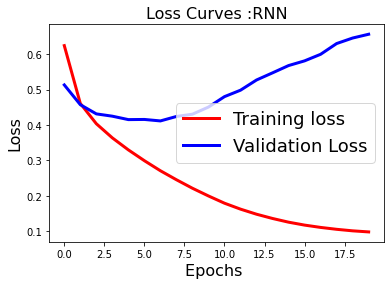

In [ ]:

fig1 = plt.figure()
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves :RNN',fontsize=16)
fig1.savefig('loss_rnn.png')
plt.show()

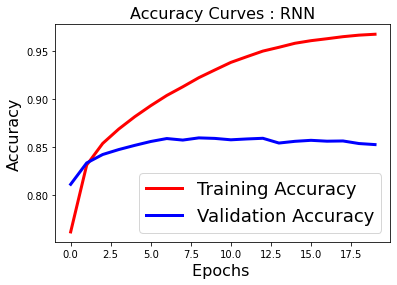

In [ ]:

fig2=plt.figure()
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves : RNN',fontsize=16)
fig2.savefig('accuracy_rnn.png')
plt.show()

**Plotting the model architecture**

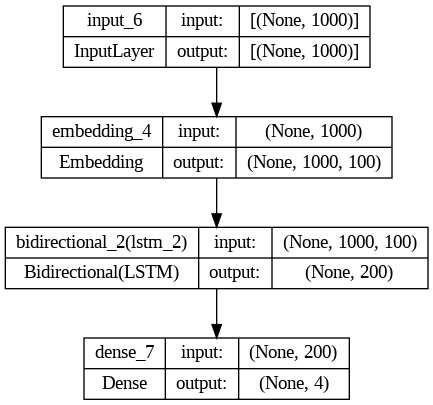

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='rnn_model.png', show_shapes=True, show_layer_names=True)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(x_val)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

1308/1308 [==============================] - 33s 24ms/step


In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.61      0.61      2552
           1       0.90      0.89      0.90     19743
           2       0.87      0.90      0.89     13825
           3       0.73      0.71      0.72      5730

    accuracy                           0.85     41850
   macro avg       0.78      0.78      0.78     41850
weighted avg       0.85      0.85      0.85     41850



In [ ]:
conf_mat = confusion_matrix(y_true, y_pred)
print(conf_mat)

[[ 1551   277   591   133]
 [  354 17608   757  1024]
 [  498   554 12461   312]
 [  164  1021   488  4057]]


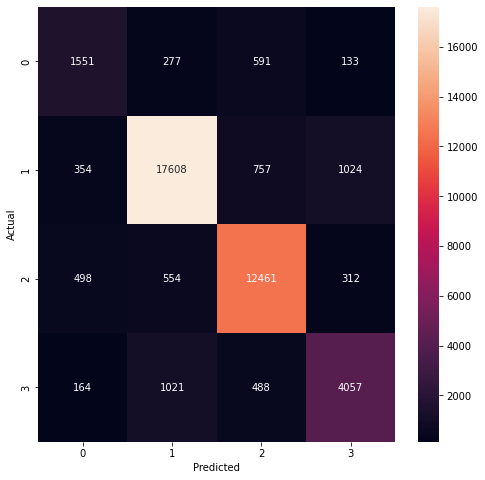

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, fmt='d',
xticklabels=macronum, yticklabels=macronum)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

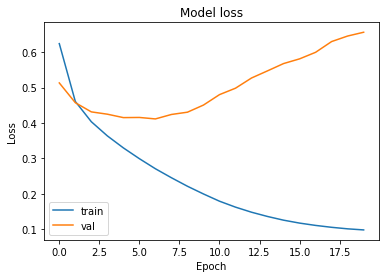

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

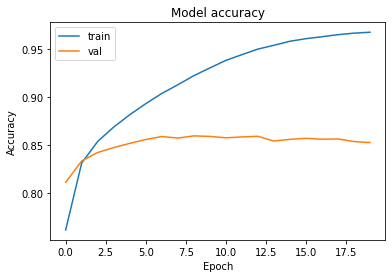

In [ ]:
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='val')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

Result Analysis:

You can get the overview of the results from the excel sheet. 
On this dataset, HAN and RNN performed better than CNN. We have kept the parameters and epochs equal, so that the results will be unbiased for all the algorithms.